Original ISIC Dataset


=== TRAIN ===
Total images: 2239
  melanoma: 438 images
  pigmented benign keratosis: 462 images
  nevus: 357 images
  basal cell carcinoma: 376 images
  actinic keratosis: 114 images
  squamous cell carcinoma: 181 images
  vascular lesion: 139 images
  seborrheic keratosis: 77 images
  dermatofibroma: 95 images

=== TEST ===
Total images: 118
  melanoma: 16 images
  pigmented benign keratosis: 16 images
  nevus: 16 images
  basal cell carcinoma: 16 images
  actinic keratosis: 16 images
  squamous cell carcinoma: 16 images
  vascular lesion: 3 images
  seborrheic keratosis: 3 images
  dermatofibroma: 16 images


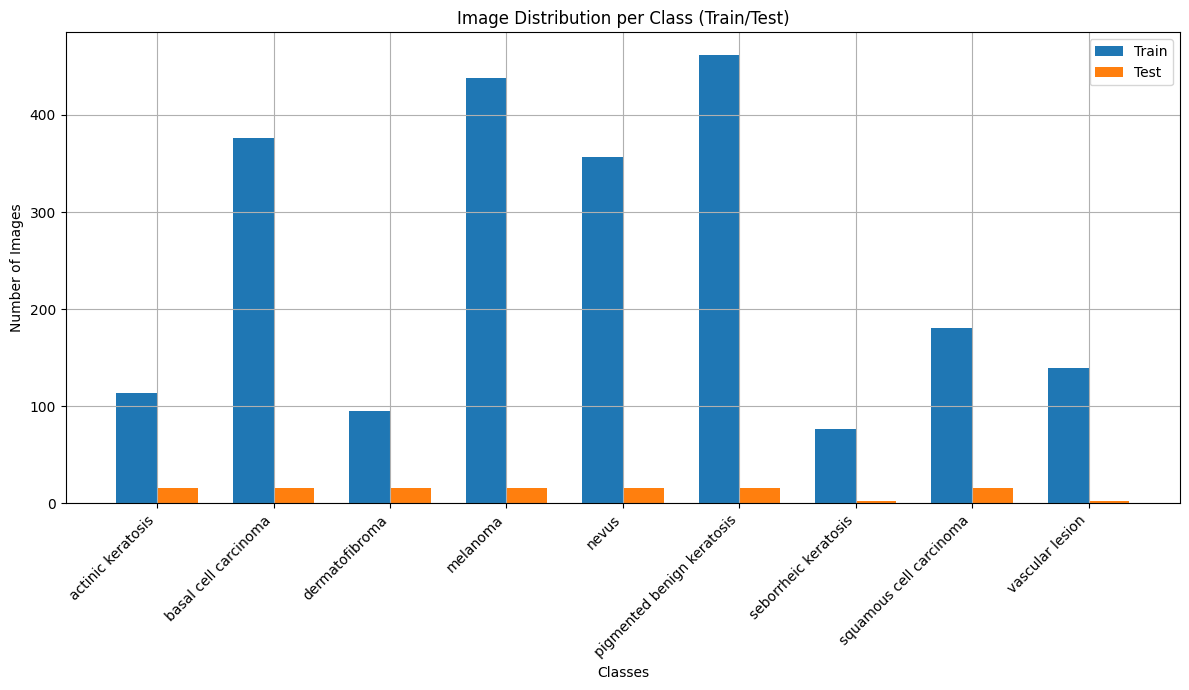

In [5]:
import os
import matplotlib.pyplot as plt

# Initialize counters
summary = {}

# Only use Train and Test folders in current directory
for split in ['Train', 'Test']:
    total_images = 0
    split_summary = {}

    if os.path.exists(split):
        for class_folder in os.listdir(split):
            class_path = os.path.join(split, class_folder)
            if os.path.isdir(class_path):
                num_images = len([
                    f for f in os.listdir(class_path)
                    if os.path.isfile(os.path.join(class_path, f))
                ])
                split_summary[class_folder] = num_images
                total_images += num_images

    summary[split.lower()] = {'total': total_images, 'classes': split_summary}

# Print the summary
for split, data in summary.items():
    print(f"\n=== {split.upper()} ===")
    print(f"Total images: {data['total']}")
    for class_name, count in data['classes'].items():
        print(f"  {class_name}: {count} images")

# ---- Plotting ----
# Prepare data
splits = ['train', 'test']
class_names = set()

# Get all unique class names
for split in splits:
    class_names.update(summary[split]['classes'].keys())

class_names = sorted(list(class_names))
x = range(len(class_names))
width = 0.35

# Data per split
train_counts = [summary['train']['classes'].get(cls, 0) for cls in class_names]
test_counts = [summary['test']['classes'].get(cls, 0) for cls in class_names]

# Plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar([p - width/2 for p in x], train_counts, width=width, label='Train')
ax.bar([p + width/2 for p in x], test_counts, width=width, label='Test')

ax.set_xlabel('Classes')
ax.set_ylabel('Number of Images')
ax.set_title('Image Distribution per Class (Train/Test)')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


Sorting HAM images into respective classes

In [7]:
import os
import shutil
import pandas as pd
from glob import glob

# Paths
csv_path = 'GroundTruth.csv'  # CSV file path
images_folder = 'images'  # Folder with all mixed images
output_folder = 'images'  # Where to organize the images

# Mapping CSV columns to folder names
label_to_folder = {
    'MEL': 'melanoma',
    'NV': 'nevus',
    'BCC': 'basal cell carcinoma',
    'AKIEC': 'actinic keratosis',
    'BKL': 'seborrheic keratosis',
    'DF': 'dermatofibroma',
    'VASC': 'vascular lesion',
}


# Create output subfolders if they don't exist
for folder in label_to_folder.values():
    os.makedirs(os.path.join(output_folder, folder), exist_ok=True)

# Load CSV
df = pd.read_csv(csv_path)

# Clean whitespace if any
df['image'] = df['image'].str.strip()

# Get list of all images available in the images folder
all_images = glob(os.path.join(images_folder, '*'))

# Create a dictionary to map image base name (without extension) to full path
image_dict = {os.path.splitext(os.path.basename(img))[0]: img for img in all_images}

# Process each row
for index, row in df.iterrows():
    image_name = row['image']

    # Find the category
    for label in label_to_folder.keys():
        if row[label] == 1.0:
            if image_name in image_dict:
                src_image_path = image_dict[image_name]
                dest_folder_path = os.path.join(output_folder, label_to_folder[label])
                dest_image_path = os.path.join(dest_folder_path, os.path.basename(src_image_path))

                shutil.move(src_image_path, dest_image_path)
            else:
                print(f"Image {image_name} not found in folder!")
            break

print("Sorted images successfully!")


Sorted images successfully!


melanoma: 1113 images
nevus: 6705 images
basal cell carcinoma: 514 images
actinic keratosis: 327 images
vascular lesion: 142 images
seborrheic keratosis: 399 images
dermatofibroma: 115 images


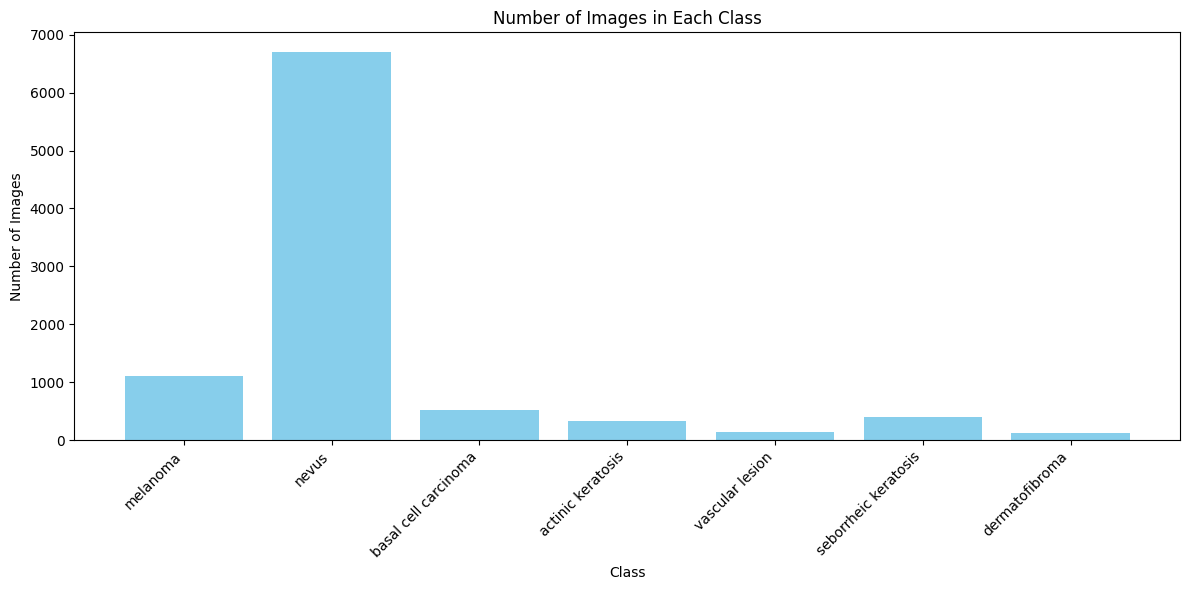

In [17]:
import os
import matplotlib.pyplot as plt

# Path where your subfolders are
output_dir = 'images'

# Get folder names
folders = [f for f in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, f))]

# Count images
counts = {}
for folder in folders:
    folder_path = os.path.join(output_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg'))]
    counts[folder] = len(image_files)

# Print counts
for folder, count in counts.items():
    print(f"{folder}: {count} images")

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(counts.keys(), counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.tight_layout()
plt.show()


Merging ISIC and HAM datasets

In [12]:
import os
import shutil

# Define your source folders
folder1 = 'images'
folder2 = 'Train'

# Define a destination folder
merged_folder = 'merged_dataset'

# Create the merged folder if it doesn't exist
os.makedirs(merged_folder, exist_ok=True)

# Get all subfolder names
subfolders1 = set(os.listdir(folder1))
subfolders2 = set(os.listdir(folder2))

# Find matching subfolders
matching_subfolders = subfolders1.intersection(subfolders2)

# Merge matching subfolders
for subfolder in matching_subfolders:
    src1 = os.path.join(folder1, subfolder)
    src2 = os.path.join(folder2, subfolder)
    dest = os.path.join(merged_folder, subfolder)

    # Create destination subfolder
    os.makedirs(dest, exist_ok=True)

    # Copy images from folder1
    for filename in os.listdir(src1):
        src_file = os.path.join(src1, filename)
        dest_file = os.path.join(dest, filename)
        if os.path.isfile(src_file):
            shutil.copy2(src_file, dest_file)

    # Copy images from folder2
    for filename in os.listdir(src2):
        src_file = os.path.join(src2, filename)
        dest_file = os.path.join(dest, filename)
        # To avoid filename collision, rename if necessary
        if os.path.exists(dest_file):
            base, ext = os.path.splitext(filename)
            new_filename = f"{base}_from_train{ext}"
            dest_file = os.path.join(dest, new_filename)
        if os.path.isfile(src_file):
            shutil.copy2(src_file, dest_file)

print("Merged ISIC and HAM succesfully")


Merged ISIC and HAM succesfully


melanoma: 1550 images
nevus: 7059 images
basal cell carcinoma: 514 images
actinic keratosis: 251 images
vascular lesion: 142 images
seborrheic keratosis: 401 images
dermatofibroma: 115 images


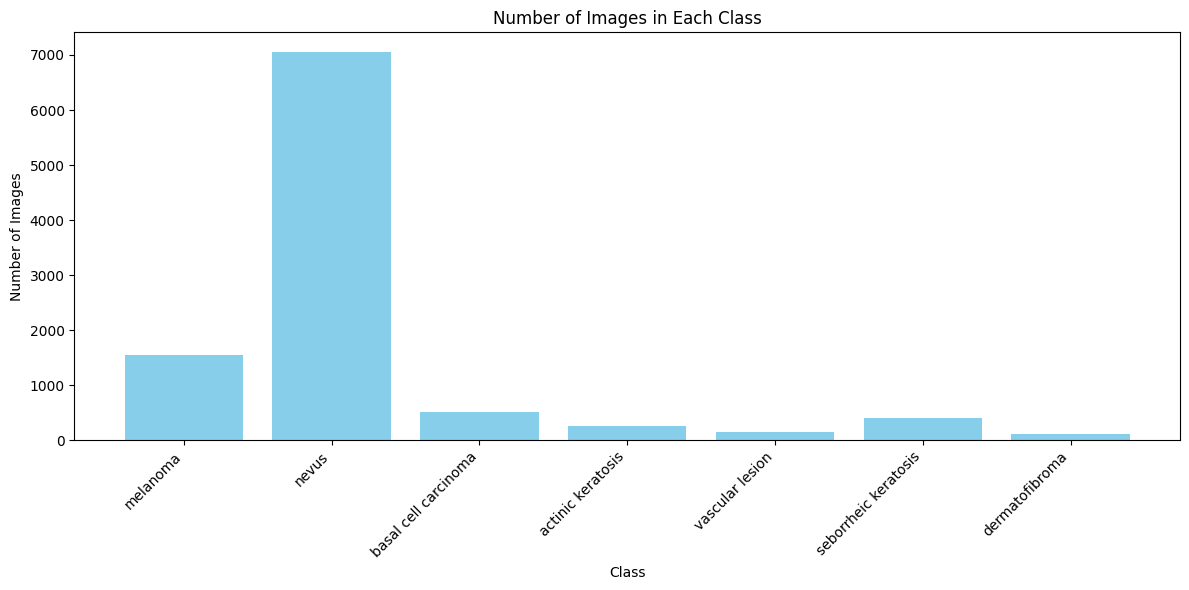

In [19]:
import os
import matplotlib.pyplot as plt

# Path where your subfolders are
output_dir = 'merged_dataset'

# Get folder names
folders = [f for f in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, f))]

# Count images
counts = {}
for folder in folders:
    folder_path = os.path.join(output_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg'))]
    counts[folder] = len(image_files)

# Print counts
for folder, count in counts.items():
    print(f"{folder}: {count} images")

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(counts.keys(), counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.tight_layout()
plt.show()


Deleting the duplicate images

In [14]:
import os
from PIL import Image
import hashlib
from collections import defaultdict

def get_image_hash(image_path):
    with Image.open(image_path) as img:
        img = img.resize((224, 224)).convert('RGB')
        return hashlib.md5(img.tobytes()).hexdigest()

def find_and_delete_duplicates(folder_path):
    hashes = {}
    subfolder_duplicates = defaultdict(int)
    deleted_files = []

    for root, _, files in os.walk(folder_path):
        folder_name = os.path.basename(root)
        for filename in files:
            file_path = os.path.join(root, filename)
            try:
                img_hash = get_image_hash(file_path)
                if img_hash in hashes:
                    # print(f"Duplicate found:\n  {file_path}\n  Duplicate of: {hashes[img_hash]}")
                    
                    # Delete the duplicate file
                    os.remove(file_path)
                    deleted_files.append(file_path)
                    subfolder_duplicates[folder_name] += 1
                else:
                    hashes[img_hash] = file_path
            except Exception as e:
                print(f"Skipped {file_path}: {e}")

    print("\nDeleted duplicate files:")
    # for file in deleted_files:
    #     print(f"Deleted: {file}")

    print("\nDuplicate count per subfolder:")
    for folder, count in subfolder_duplicates.items():
        print(f"Subfolder '{folder}': {count} file(s) deleted")

    print(f"\nTotal duplicates deleted: {len(deleted_files)}")
    return deleted_files, subfolder_duplicates

find_and_delete_duplicates('merged_dataset')




Deleted duplicate files:

Duplicate count per subfolder:
Subfolder 'melanoma': 1 file(s) deleted
Subfolder 'nevus': 3 file(s) deleted
Subfolder 'basal cell carcinoma': 376 file(s) deleted
Subfolder 'actinic keratosis': 190 file(s) deleted
Subfolder 'vascular lesion': 139 file(s) deleted
Subfolder 'seborrheic keratosis': 75 file(s) deleted
Subfolder 'dermatofibroma': 95 file(s) deleted

Total duplicates deleted: 879


(['merged_dataset/melanoma/ISIC_0000280.jpg',
  'merged_dataset/nevus/ISIC_0000512.jpg',
  'merged_dataset/nevus/ISIC_0024777.jpg',
  'merged_dataset/nevus/ISIC_0029861.jpg',
  'merged_dataset/basal cell carcinoma/ISIC_0024743.jpg',
  'merged_dataset/basal cell carcinoma/ISIC_0026593.jpg',
  'merged_dataset/basal cell carcinoma/ISIC_0027920_from_train.jpg',
  'merged_dataset/basal cell carcinoma/ISIC_0024582_from_train.jpg',
  'merged_dataset/basal cell carcinoma/ISIC_0028807.jpg',
  'merged_dataset/basal cell carcinoma/ISIC_0028147_from_train.jpg',
  'merged_dataset/basal cell carcinoma/ISIC_0027473.jpg',
  'merged_dataset/basal cell carcinoma/ISIC_0024590.jpg',
  'merged_dataset/basal cell carcinoma/ISIC_0025102_from_train.jpg',
  'merged_dataset/basal cell carcinoma/ISIC_0029919_from_train.jpg',
  'merged_dataset/basal cell carcinoma/ISIC_0027846_from_train.jpg',
  'merged_dataset/basal cell carcinoma/ISIC_0028973_from_train.jpg',
  'merged_dataset/basal cell carcinoma/ISIC_0028035.

melanoma: 1550 images
nevus: 7059 images
basal cell carcinoma: 514 images
actinic keratosis: 251 images
vascular lesion: 142 images
seborrheic keratosis: 401 images
dermatofibroma: 115 images


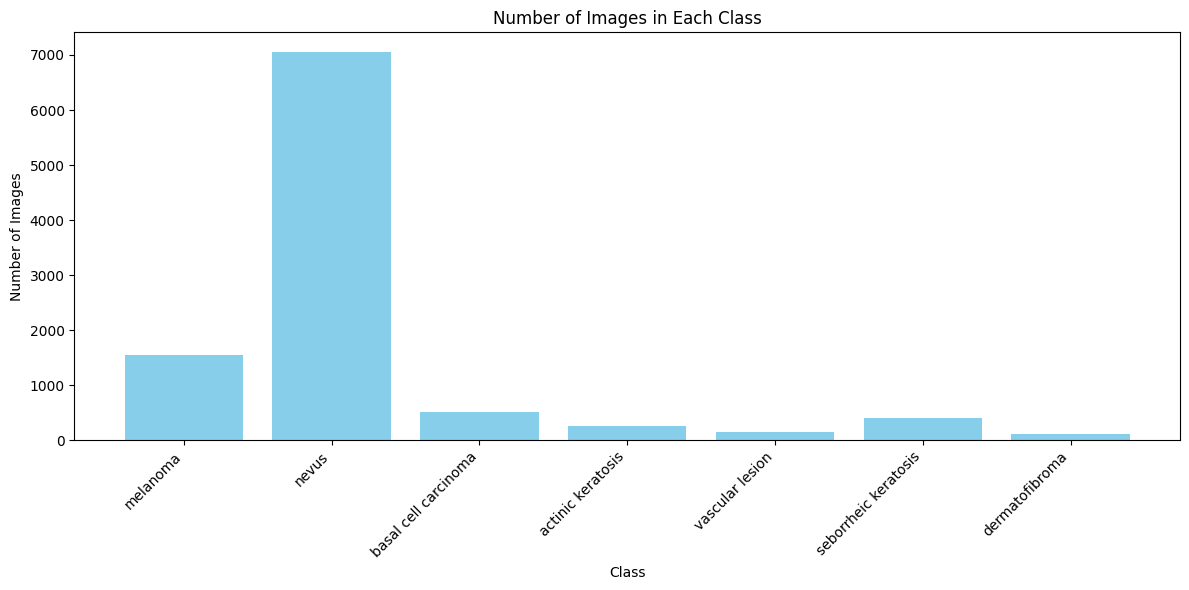

In [20]:
import os
import matplotlib.pyplot as plt

# Path where your subfolders are
output_dir = 'merged_dataset'

# Get folder names
folders = [f for f in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, f))]

# Count images
counts = {}
for folder in folders:
    folder_path = os.path.join(output_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg'))]
    counts[folder] = len(image_files)

# Print counts
for folder, count in counts.items():
    print(f"{folder}: {count} images")

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(counts.keys(), counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.tight_layout()
plt.show()


In [21]:
import os
import shutil
import random

# Source folder (merged dataset)
source_folder = 'merged_dataset'

# Destination folder (filtered and balanced dataset)
destination_folder = 'filtered_dataset'

# Ensure destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Set the target number of images per class
target_num_images = 514

# Go through each subfolder
for subfolder in os.listdir(source_folder):
    subfolder_path = os.path.join(source_folder, subfolder)

    if os.path.isdir(subfolder_path):
        images = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]
        num_images = len(images)

        if num_images >= target_num_images:
            # Randomly select 890 images if there are more
            selected_images = images
            if num_images > target_num_images:
                selected_images = random.sample(images, target_num_images)

            dest_subfolder_path = os.path.join(destination_folder, subfolder)
            os.makedirs(dest_subfolder_path, exist_ok=True)

            # Copy selected images
            for img_file in selected_images:
                src_file = os.path.join(subfolder_path, img_file)
                dest_file = os.path.join(dest_subfolder_path, img_file)
                shutil.copy2(src_file, dest_file)

            print(f"Copied '{subfolder}' with {len(selected_images)} images.")
        else:
            print(f"Skipped '{subfolder}' (only {num_images} images).")
            
print("Filtering completed!")


Copied 'melanoma' with 514 images.
Copied 'nevus' with 514 images.
Copied 'basal cell carcinoma' with 514 images.
Skipped 'actinic keratosis' (only 251 images).
Skipped 'vascular lesion' (only 142 images).
Skipped 'seborrheic keratosis' (only 401 images).
Skipped 'dermatofibroma' (only 115 images).
Filtering completed!


melanoma: 514 images
nevus: 514 images
basal cell carcinoma: 514 images


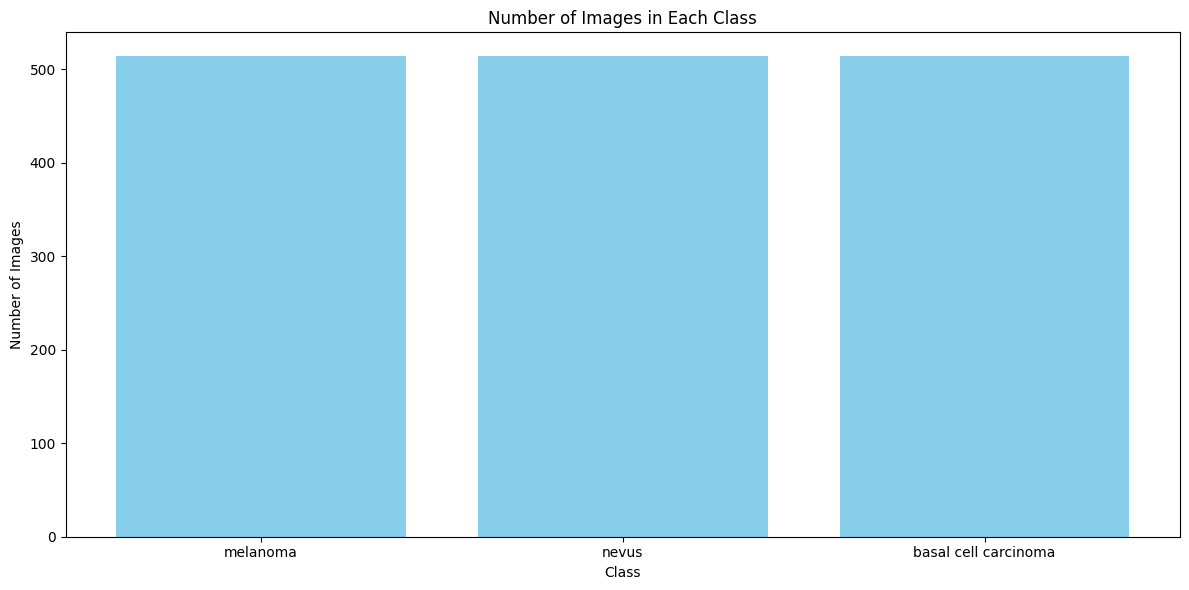

In [23]:
import os
import matplotlib.pyplot as plt

# Path where your subfolders are
output_dir = 'filtered_dataset'

# Get folder names
folders = [f for f in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, f))]

# Count images
counts = {}
for folder in folders:
    folder_path = os.path.join(output_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg'))]
    counts[folder] = len(image_files)

# Print counts
for folder, count in counts.items():
    print(f"{folder}: {count} images")

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(counts.keys(), counts.values(), color='skyblue')
plt.xticks()
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.tight_layout()
plt.show()


Creating synthetic images

In [24]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from PIL import Image

Image.LOAD_TRUNCATED_IMAGES = True

# Original training directory
train_dir = "merged_dataset"

# New directory to store original + augmented images
augmented_dir = "augmented_dataset"

# Class subfolders
subfolders = ["melanoma", "nevus", "basal cell carcinoma"]

# Number of synthetic images to generate per original image
num_augmented_images = 2

# Image augmentation setup
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    shear_range=0.2,
    fill_mode='nearest'
)

# Create the augmented directory structure
for subfolder in subfolders:
    os.makedirs(os.path.join(augmented_dir, subfolder), exist_ok=True)

# Process images
for subfolder in subfolders:
    source_path = os.path.join(train_dir, subfolder)
    target_path = os.path.join(augmented_dir, subfolder)

    image_files = [f for f in os.listdir(source_path) if os.path.isfile(os.path.join(source_path, f))]

    for image_file in image_files:
        image_path = os.path.join(source_path, image_file)
        target_image_path = os.path.join(target_path, image_file)

        try:
            # Copy original image
            shutil.copy(image_path, target_image_path)

            # Load and augment image
            img = load_img(image_path)
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=target_path,
                                      save_prefix='ISIC', save_format='jpg'):
                i += 1
                if i >= num_augmented_images:
                    break

        except Exception as e:
            print(f"Error processing {image_path}: {e}")

print("Original and augmented image saving complete!")


Original and augmented image saving complete!


melanoma: 1496 images
nevus: 1480 images
basal cell carcinoma: 1499 images


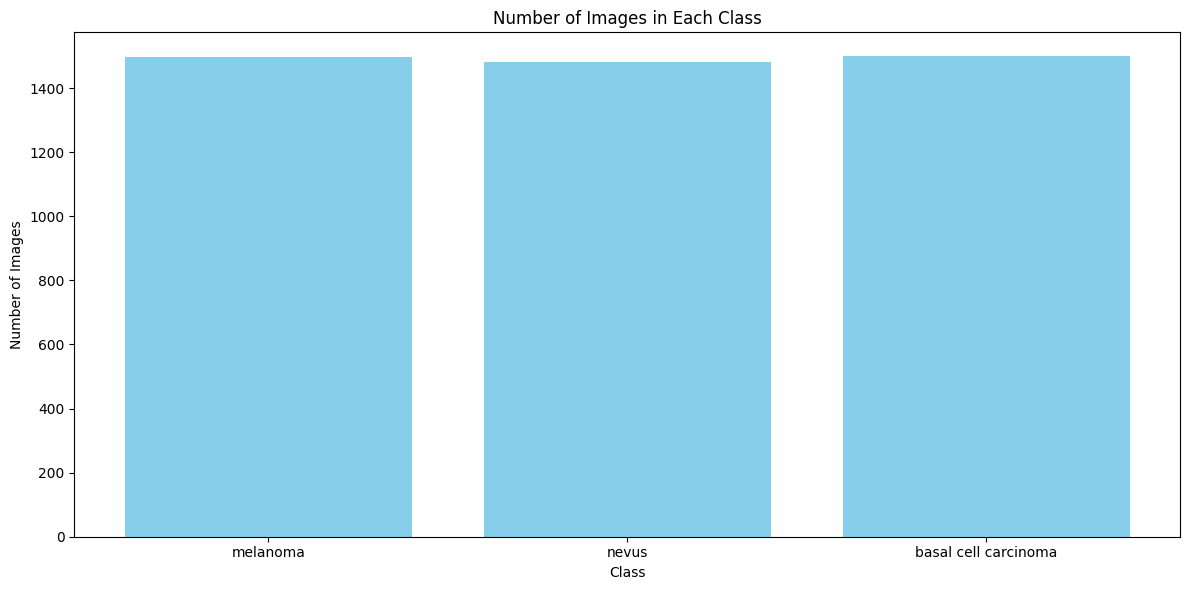

In [29]:
import os
import matplotlib.pyplot as plt

# Path where your subfolders are
output_dir = 'augmented_dataset'

# Get folder names
folders = [f for f in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, f))]

# Count images
counts = {}
for folder in folders:
    folder_path = os.path.join(output_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg'))]
    counts[folder] = len(image_files)

# Print counts
for folder, count in counts.items():
    print(f"{folder}: {count} images")

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(counts.keys(), counts.values(), color='skyblue')
plt.xticks()
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.tight_layout()
plt.show()


In [30]:
import os
import shutil
import random

# Original dataset directory
source_dir = "augmented_dataset"

# Destination base directory
destination_base = "Final_dataset"
splits = {
    "train": 1000,
    "val": 350,
    "test": 100
}

# Ensure reproducibility
random.seed(24)

# Create target directories
for split in splits:
    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)
        if os.path.isdir(class_path):
            dest_path = os.path.join(destination_base, split, class_name)
            os.makedirs(dest_path, exist_ok=True)

# Process each class folder
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    all_images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    random.shuffle(all_images)

    total_needed = sum(splits.values())
    if len(all_images) < total_needed:
        print(f"Not enough images in class '{class_name}'. Needed: {total_needed}, Found: {len(all_images)}")
        continue

    start = 0
    for split, count in splits.items():
        split_images = all_images[start:start + count]
        dest_dir = os.path.join(destination_base, split, class_name)
        for img in split_images:
            src_img_path = os.path.join(class_path, img)
            dst_img_path = os.path.join(dest_dir, img)
            shutil.copyfile(src_img_path, dst_img_path)
        start += count

print("Dataset split complete.")


Dataset split complete.


In [ ]:
import os
import matplotlib.pyplot as plt

# Path to your split dataset
split_dataset_path = 'Final_Dataset'

# Initialize counters
summary = {}

# Include Train, Val, and Test splits
for split in ['train', 'val', 'test']:
    split_path = os.path.join(split_dataset_path, split)
    total_images = 0
    split_summary = {}

    if os.path.exists(split_path):
        for subfolder in os.listdir(split_path):
            class_path = os.path.join(split_path, subfolder)
            if os.path.isdir(class_path):
                num_images = len([
                    f for f in os.listdir(class_path)
                    if os.path.isfile(os.path.join(class_path, f))
                ])
                split_summary[subfolder] = num_images
                total_images += num_images

    summary[split] = {'total': total_images, 'classes': split_summary}

# Print the summary
for split, data in summary.items():
    print(f"\n=== {split.upper()} ===")
    print(f"Total images: {data['total']}")
    for class_name, count in data['classes'].items():
        print(f"  {class_name}: {count} images")

# ---- Plotting ----
# Collect data for plotting
splits = ['train', 'val', 'test']
class_names = set()

# Get all unique class names
for split in splits:
    class_names.update(summary[split]['classes'].keys())

class_names = sorted(list(class_names))

# Create a grouped bar chart
x = range(len(class_names))
width = 0.25  # Width of the bars

# Data per split
train_counts = [summary['train']['classes'].get(cls, 0) for cls in class_names]
val_counts = [summary['val']['classes'].get(cls, 0) for cls in class_names]
test_counts = [summary['test']['classes'].get(cls, 0) for cls in class_names]

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar([p - width for p in x], train_counts, width=width, label='Train')
ax.bar(x, val_counts, width=width, label='Validation')
ax.bar([p + width for p in x], test_counts, width=width, label='Test')

# Labeling
ax.set_xlabel('Classes')
ax.set_ylabel('Number of Images')
ax.set_title('Image Distribution per Class (Train/Val/Test)')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()
